In [64]:
! pip install PyMySQL
! pip install ipython-sql
! pip install mysqlclient
import pymysql
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [65]:

db_name = "ObesityDB"
db_host = "localhost"
db_username = "root"
db_password = "Jobhunting@2024"

try:
    conn = pymysql. connect (host = db_host,
                            port = int(3306),
                            user = "root",
                            password = db_password,
                            db = db_name)

except e:
    print (e)
if conn:
    print ("connection successful")
else:

        print ("error")


connection successful


C:\Users\DELL\AppData\Local\Temp\ipykernel_23840\3846105851.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


,NObeyesdad,PatientCount
0,Normal_Weight,287
1,Overweight_Level_I,290
2,Overweight_Level_II,290
3,Obesity_Type_I,351
4,Insufficient_Weight,272
5,Obesity_Type_II,297
6,Obesity_Type_III,324


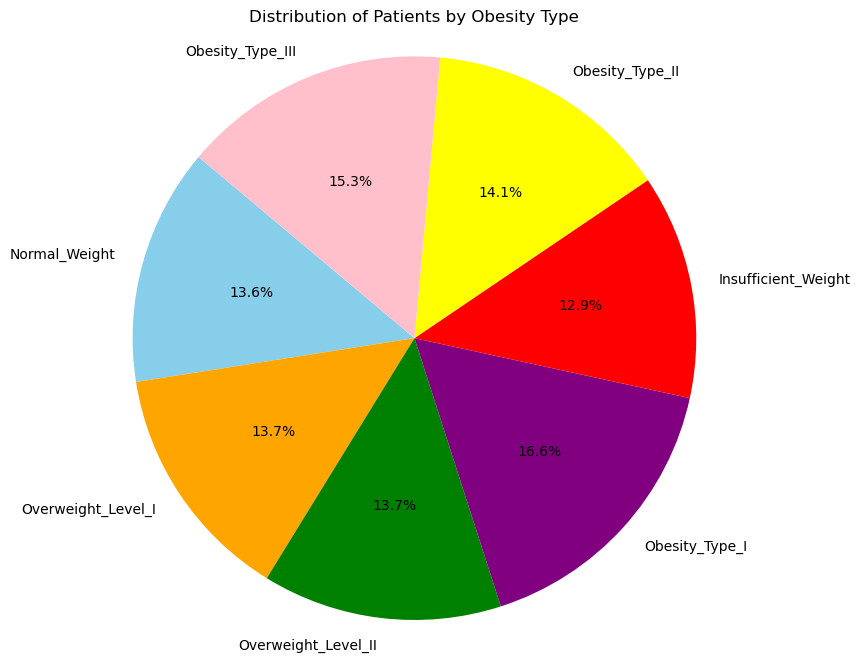

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the SQL query to count patients for each obesity type
query = """
SELECT m.NObeyesdad, COUNT(p.Patient_ID) AS PatientCount
FROM PatientInfo p
JOIN MedicalData m ON p.Medical_ID = m.Medical_ID
GROUP BY m.NObeyesdad;
"""

# Fetch the data into a pandas DataFrame
data = pd.read_sql(query, conn)

# Display the data
display(data)

# Pie chart: Plotting the distribution of patients across obesity types
plt.figure(figsize=(8, 8))

# Plotting the pie chart
plt.pie(data['PatientCount'], labels=data['NObeyesdad'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'purple', 'red', 'Yellow', 'Pink'])

# Title
plt.title('Distribution of Patients by Obesity Type')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_23840\4104386202.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


,Age_Group,Disease_Risk,PatientCount
0,18-24,Insufficient_Weight,229
1,18-24,Normal_Weight,215
2,18-24,Obesity_Type_I,220
3,18-24,Obesity_Type_II,72
4,18-24,Obesity_Type_III,156
5,18-24,Overweight_Level_I,201
6,18-24,Overweight_Level_II,150
7,25-34,Insufficient_Weight,4
8,25-34,Normal_Weight,39
9,25-34,Obesity_Type_I,53


<Figure size 1000x600 with 0 Axes>

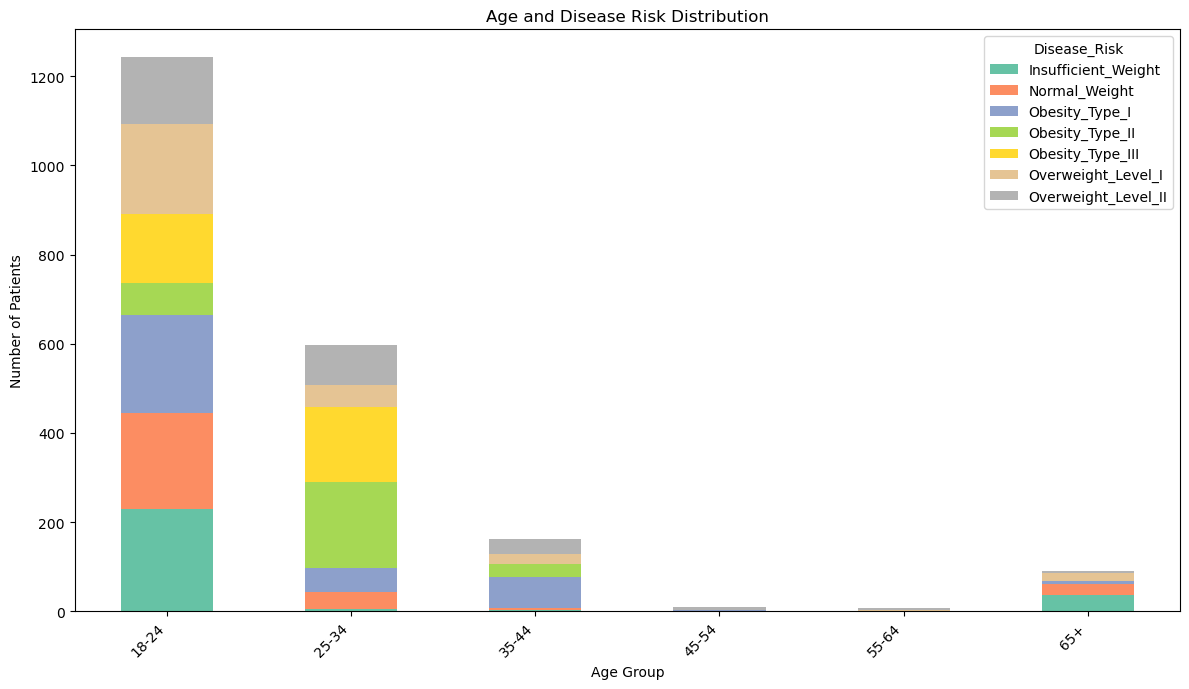

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the SQL query to get the patient counts by age group and disease risk
query = """
SELECT
    CASE
        WHEN p.Age BETWEEN 18 AND 24 THEN '18-24'
        WHEN p.Age BETWEEN 25 AND 34 THEN '25-34'
        WHEN p.Age BETWEEN 35 AND 44 THEN '35-44'
        WHEN p.Age BETWEEN 45 AND 54 THEN '45-54'
        WHEN p.Age BETWEEN 55 AND 64 THEN '55-64'
        WHEN p.Age >= 65 THEN '65+'
        ELSE '65+'
    END AS Age_Group,
    m.NObeyesdad AS Disease_Risk,
    COUNT(p.Patient_ID) AS PatientCount
FROM PatientInfo p
JOIN MedicalData m ON p.Medical_ID = m.Medical_ID
GROUP BY Age_Group, m.NObeyesdad
ORDER BY Age_Group;
"""

# Fetch the data into a pandas DataFrame
data = pd.read_sql(query, conn)

# Display the data to verify
display(data)

# Pivot the data to have Age_Group as index and Disease_Risk as columns
pivot_data = data.pivot_table(index='Age_Group', columns='Disease_Risk', values='PatientCount', aggfunc='sum', fill_value=0)

# Plotting a bar chart to visualize the distribution of disease risk across age groups
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Age and Disease Risk Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_23840\1656594049.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


,Patient_ID,Gender,Age,Obesity_Type,SMOKE,CALC,FAVC
0,11,Male,26,Obesity_Type_I,no,Sometimes,yes
1,14,Male,41,Obesity_Type_I,no,Frequently,yes
2,18,Female,29,Obesity_Type_I,no,no,yes
3,22,Female,52,Obesity_Type_I,yes,no,yes
4,24,Female,22,Obesity_Type_I,no,Sometimes,yes
...,...,...,...,...,...,...,...
953,2107,Female,21,Obesity_Type_III,no,Sometimes,yes
954,2108,Female,22,Obesity_Type_III,no,Sometimes,yes
955,2109,Female,23,Obesity_Type_III,no,Sometimes,yes
956,2110,Female,24,Obesity_Type_III,no,Sometimes,yes


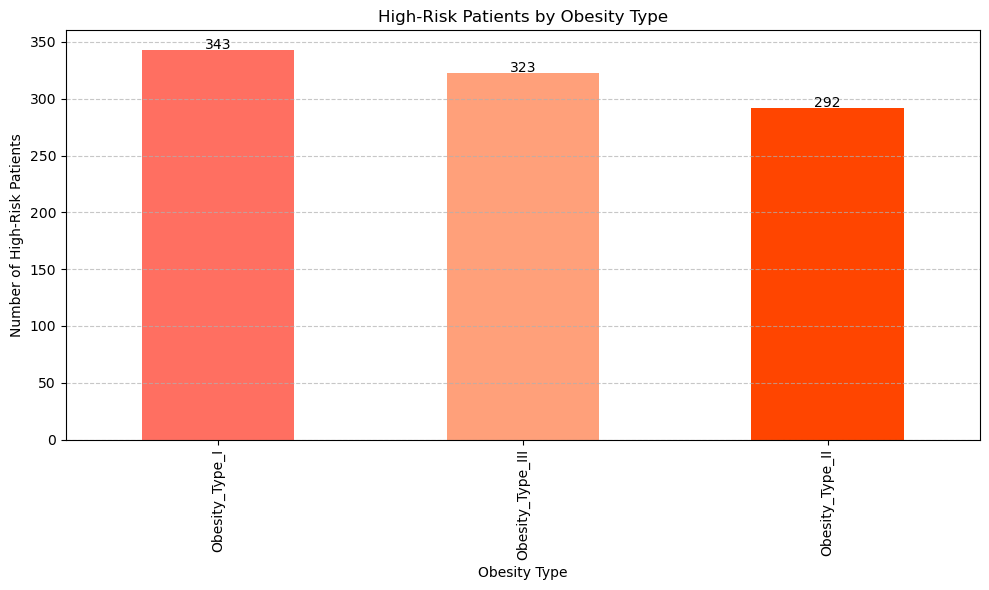

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the SQL query to fetch high-risk patient data
query = """
SELECT 
    p.Patient_ID, 
    p.Gender, 
    p.Age, 
    m.NObeyesdad AS Obesity_Type, 
    l.SMOKE, 
    l.CALC, 
    l.FAVC
FROM PatientInfo p
JOIN Lifestyle l ON p.Lifestyle_ID = l.Lifestyle_ID
JOIN MedicalData m ON p.Medical_ID = m.Medical_ID
WHERE 
    m.NObeyesdad IN ('Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III') 
    AND (l.SMOKE = 'Yes' OR l.CALC IN ('Frequently', 'Always') OR l.FAVC = 'Yes');
"""

# Fetch data into a pandas DataFrame
data = pd.read_sql(query, conn)

# Display the data to verify
display(data)

# Count the number of high-risk patients by obesity type
obesity_counts = data['Obesity_Type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
colors = ['#FF6F61', '#FFA07A', '#FF4500']
obesity_counts.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Obesity Type')
plt.ylabel('Number of High-Risk Patients')
plt.title('High-Risk Patients by Obesity Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on bars
for i, count in enumerate(obesity_counts):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_23840\1981298106.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


,Gender,Avg_Exercise,Avg_BMI
0,Female,0.847137,30.130002
1,Male,1.169639,29.280377


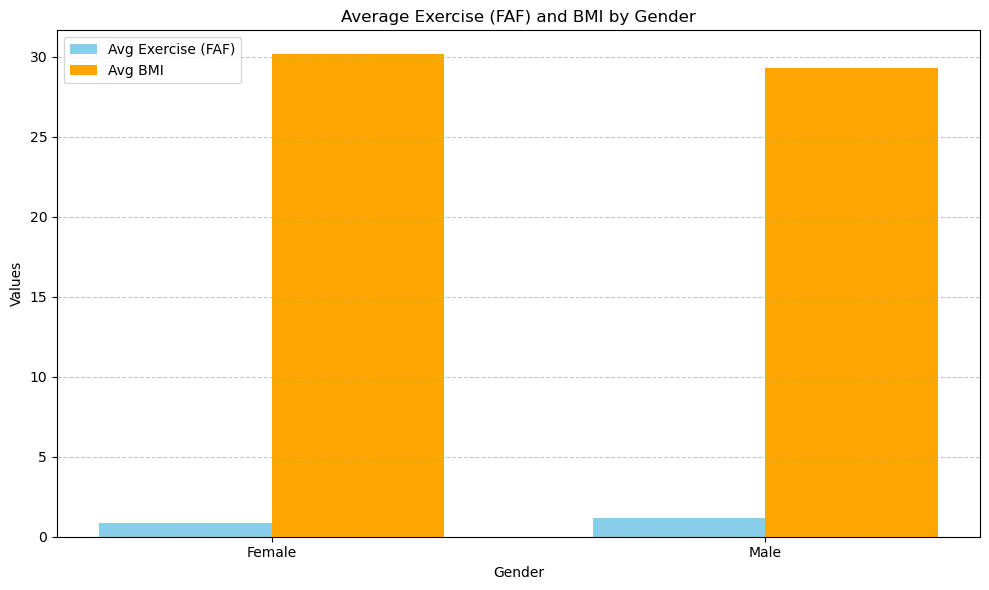

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the SQL query and fetch results into a pandas DataFrame
query = """
SELECT p.Gender, 
       AVG(l.FAF) AS Avg_Exercise, 
       AVG(p.Weight / (p.Height * p.Height)) AS Avg_BMI
FROM PatientInfo p
JOIN Lifestyle l ON p.Lifestyle_ID = l.Lifestyle_ID
GROUP BY p.Gender;
"""
data = pd.read_sql(query, conn)

# Display the DataFrame
display(data)

# Plotting a grouped bar chart
plt.figure(figsize=(10, 6))
x = data['Gender']
bar_width = 0.35
index = range(len(x))

# Bar plots for Avg_Exercise and Avg_BMI
plt.bar(index, data['Avg_Exercise'], bar_width, label='Avg Exercise (FAF)', color='skyblue')
plt.bar([i + bar_width for i in index], data['Avg_BMI'], bar_width, label='Avg BMI', color='orange')

# Labels and titles
plt.xlabel('Gender')
plt.ylabel('Values')
plt.title('Average Exercise (FAF) and BMI by Gender')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()

# Display grid and tight layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_23840\1340718478.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  exercise_query = pd.read_sql("""


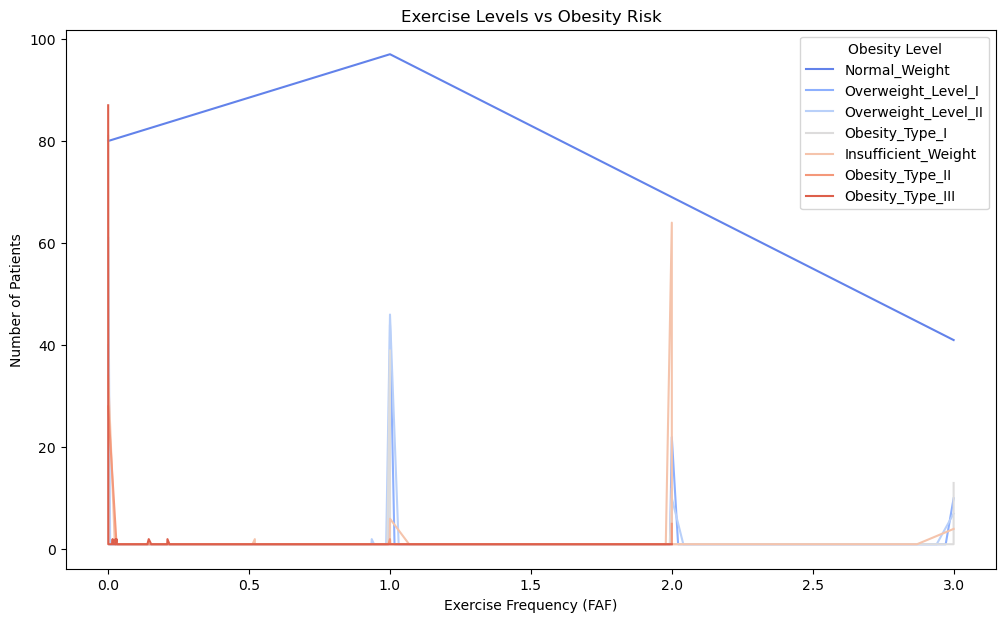

In [171]:
# Execute query
exercise_query = pd.read_sql("""
    SELECT l.FAF, m.NObeyesdad, COUNT(p.Patient_ID) AS PatientCount
    FROM PatientInfo p
    JOIN Lifestyle l ON p.Lifestyle_ID = l.Lifestyle_ID
    JOIN MedicalData m ON p.Medical_ID = m.Medical_ID
    GROUP BY l.FAF, m.NObeyesdad;
""", conn)

# Plotting the results
plt.figure(figsize=(12, 7))
sns.lineplot(data=exercise_query, x="FAF", y="PatientCount", hue="NObeyesdad", palette="coolwarm")
plt.title("Exercise Levels vs Obesity Risk")
plt.xlabel("Exercise Frequency (FAF)")
plt.ylabel("Number of Patients")
plt.legend(title="Obesity Level")
plt.show()
